In [1]:
using Pkg
Pkg.add("DataInterpolations")
using DataInterpolations
using Plots
using ForwardDiff
using StableRNGs
using Pkg
Pkg.add("Optim")
using Optim
Pkg.add("RegularizationTools")
using RegularizationTools

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


Adding data points and testing with cubic spline, akima interpolation, linear interpolation, quadratic interpolation, cubic hermite spline

In [2]:
# @show u = rand(5)
# t = 0:5
# interp = LinearInterpolation(u, t)
# @show interp(3.5) # Gives the linear interpolation value at t=3.5

# t′ = 0.5:1.0:3.5
# @show interp(t′)

# u′ = similar(u, length(t′))
# @show interp(u′, t′)

In [3]:
n = 10

u = rand(n)
t = 0:n-1

t_new = 0:0.1:n-1

# u = [14.7, 11.51, 10.41, 14.95, 12.24, 11.22]
# t = [0.0, 62.25, 109.66, 162.66, 205.8, 252.3]

# t_new = 0:0.1:252

0.0:0.1:9.0

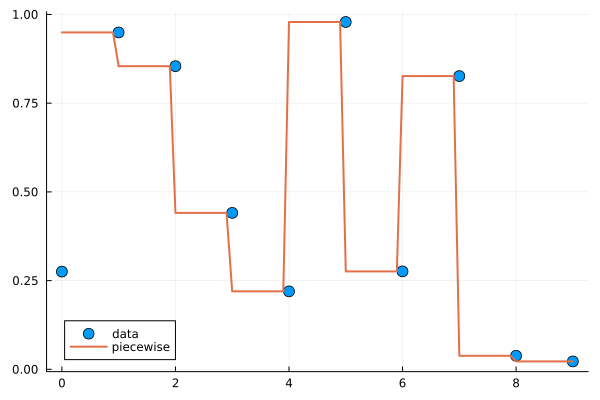

In [4]:
ci = ConstantInterpolation(u,t; extrapolation = ExtrapolationType.Extension)

u_new = ci.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="piecewise")

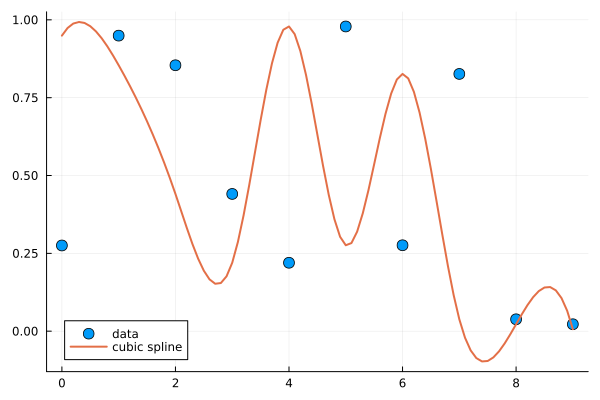

In [5]:
cub = CubicSpline(u, t; extrapolation = ExtrapolationType.Extension)

u_new = cub.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="cubic spline")

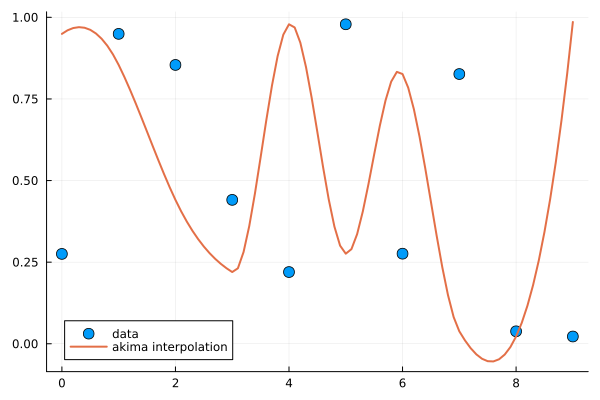

In [6]:
aki = AkimaInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = aki.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="akima interpolation")

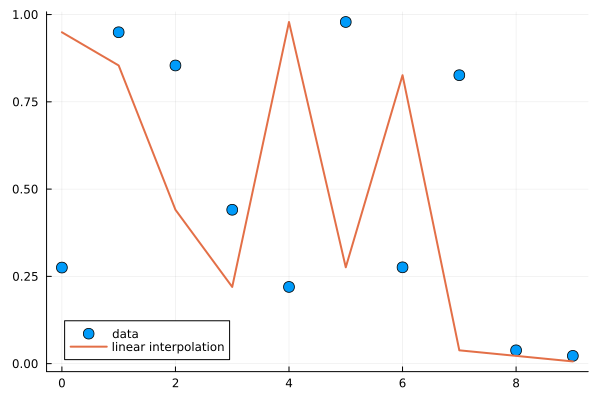

In [7]:
lin = LinearInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = lin.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="linear interpolation")

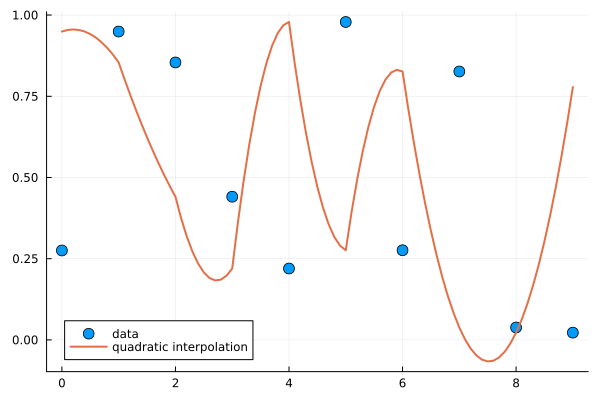

In [8]:
quad = QuadraticInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = quad.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="quadratic interpolation")

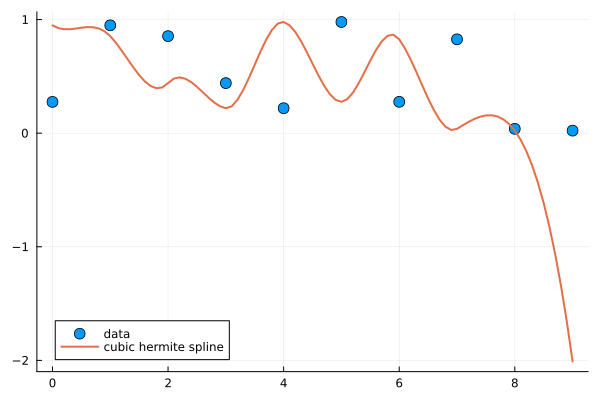

In [9]:
idx = (t .- t[1]) ./ (t[2] - t[1]) .+ 1

f(x) = cub(x)

du_didx = ForwardDiff.derivative.(f, idx)

dt = t[2] - t[1]
du = du_didx ./ dt

chs = CubicHermiteSpline(du, u, t; extrapolation = ExtrapolationType.Extension)

u_new = chs.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="cubic hermite spline")

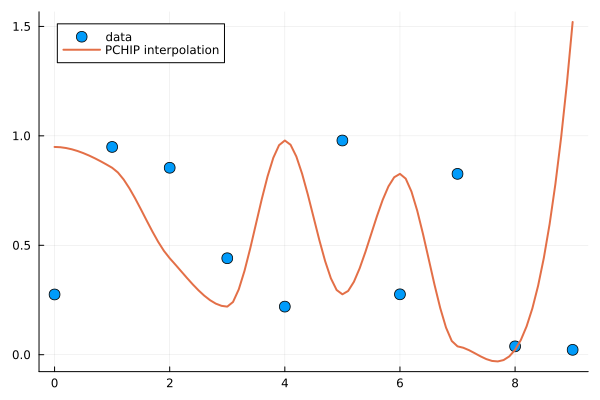

In [10]:
PCHIP = PCHIPInterpolation(u, t; extrapolation = ExtrapolationType.Extension)

u_new = PCHIP.((t_new .- t[1]) .+ 1)

plot(t, u, seriestype=:scatter, label="data", markersize=6)
plot!(t_new, u_new, linewidth=2, label="PCHIP interpolation")

In [11]:
du2 = [-0.047, -0.058, 0.054, 0.012, -0.068, 0.0]
u2 = [14.7, 11.51, 10.41, 14.95, 12.24, 11.22]
t2 = [0.0, 62.25, 109.66, 162.66, 205.8, 252.3]

t2_new = 0:1:252

0:1:252

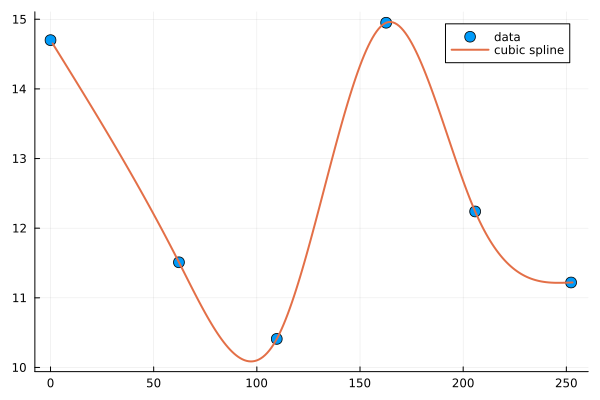

In [12]:
cub2 = CubicSpline(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = cub2.((t2_new .- t2[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="cubic spline")

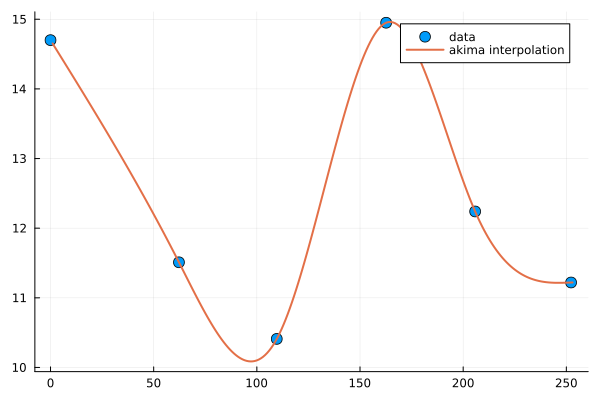

In [13]:
aki2 = AkimaInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u_new2 = aki2.((t2_new .- t2[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="akima interpolation")

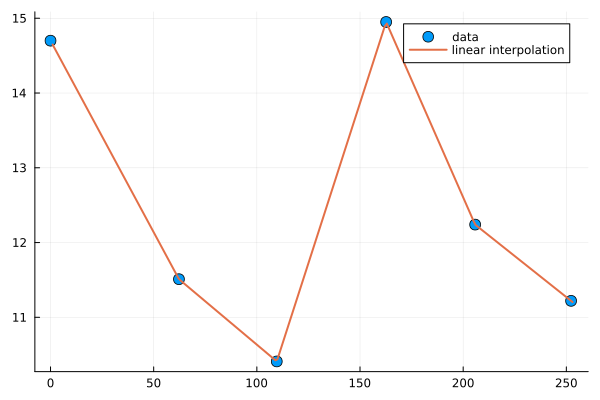

In [14]:
lin2 = LinearInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = lin2.((t2_new .- t2[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="linear interpolation")

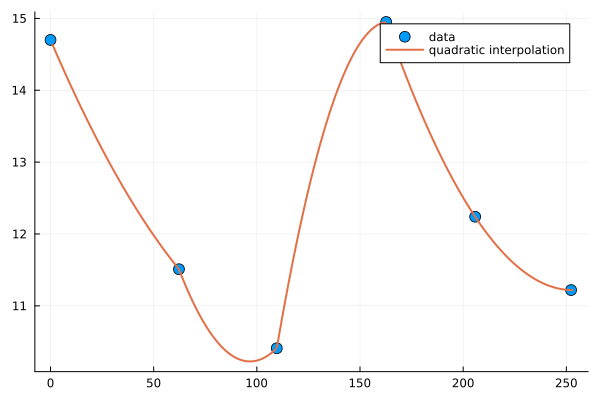

In [15]:
quad2 = QuadraticInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = quad2.((t2_new .- t2[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="quadratic interpolation")

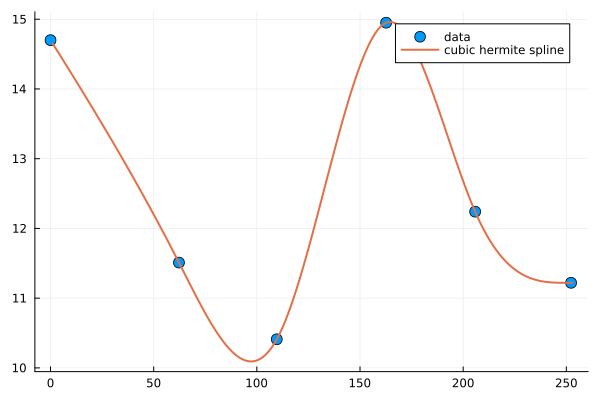

In [16]:
chs2 = CubicHermiteSpline(du2, u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = chs2.((t2_new .- t2[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="cubic hermite spline")

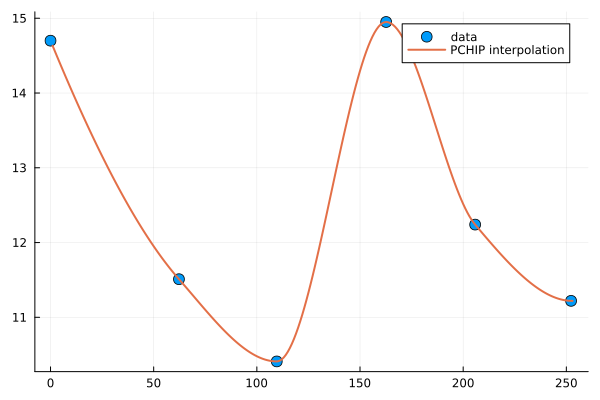

In [17]:
PCHIP2 = PCHIPInterpolation(u2, t2; extrapolation = ExtrapolationType.Extension)

u2_new = PCHIP2.((t2_new .- t[1]) .+ 1)

plot(t2, u2, seriestype=:scatter, label="data", markersize=6)
plot!(u2_new, linewidth=2, label="PCHIP interpolation")

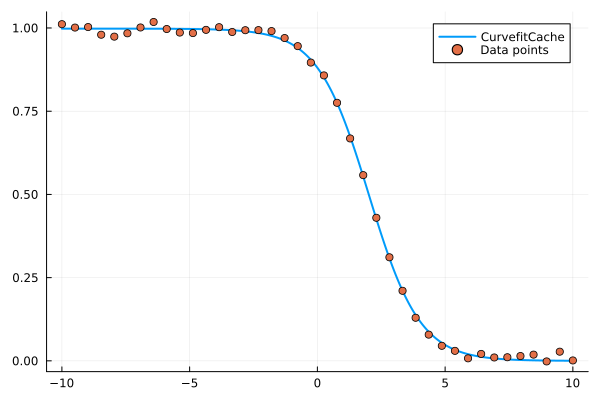

In [24]:
rng = StableRNG(4)
model(x, p) = @. p[1] / (1 + exp(x - p[2]))
t3 = range(-10, stop = 10, length = 40)
u3 = model(t3, [1.0, 2.0]) + 0.01 * randn(rng, length(t3))
p0 = [0.5, 0.5]

A = Curvefit(u3, t3, model, p0, LBFGS())

plot(A, linewidth=2)

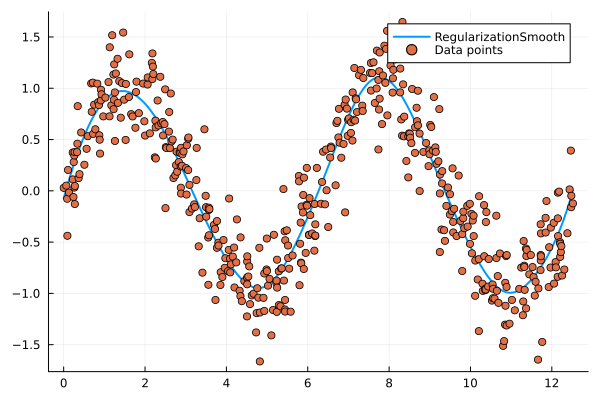

In [59]:
npts =10000
xmin = 0.0
xspan = 4 * π
x = collect(range(xmin, xmin + xspan, length = npts))
rng = StableRNG(655)
x = x + xspan / npts * (rand(rng, npts) .- 0.5)
# select a subset randomly
idx = unique(rand(rng, collect(eachindex(x)), 500))
t = x[unique(idx)]
npts = length(t)
ut = sin.(t)
stdev = .3 * maximum(ut)
u = ut + stdev * randn(rng, npts)
# data must be ordered if t̂ is not provided
idx = sortperm(t)
tₒ = t[idx]
uₒ = u[idx]


A = RegularizationSmooth(uₒ, tₒ, 4; λ = 1e-2, alg = :fixed)

plot(A, linewidth=2)

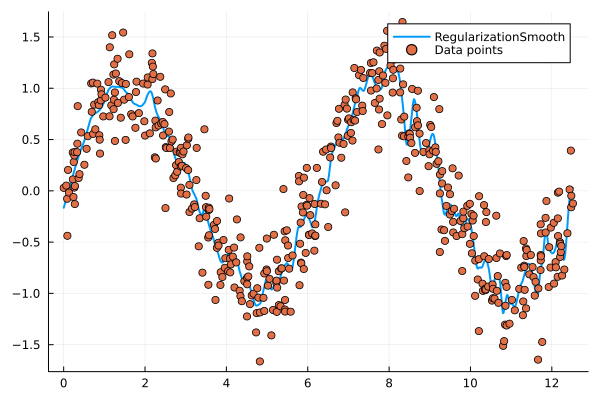

In [47]:
# A = RegularizationSmooth(uₒ, tₒ, nothing, :midpoint)
A = RegularizationSmooth(uₒ, tₒ, nothing, collect(1:npts); λ = 0.05, alg = :fixed)

plot(A, linewidth=2)

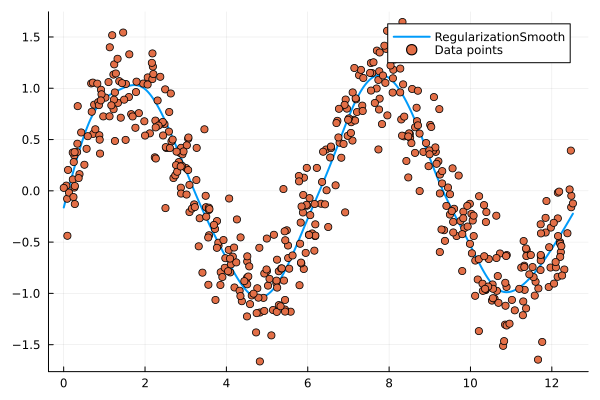

In [50]:
N̂ = 20
t̂ = collect(range(xmin, xmin + xspan, length = N̂))
nhalf = Int(floor(npts / 2))
wls = vcat(ones(nhalf), 10 * ones(npts - nhalf))
wr = collect(1:(N̂ - 2))
A = RegularizationSmooth(u, t, t̂, wls, wr)

plot(A, linewidth=2)